In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#images to tensor
#grab the mnist image files and convert it into pytorch tensors
transform=transforms.ToTensor()

In [6]:
#load in the training set into this folder Data specify it is the training data download it and transform it into the tensor
train_data=datasets.MNIST(root='../Data',train=True,download=True,transform=transform)

In [7]:
#Loading the testing set into the folder with same settings as above
test_data=datasets.MNIST(root='../Data',train=False,download=True,transform=transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
#examine a single training record
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
type(train_data[0]) #its a bunch of tensors grouped together, a tensor and a lable

tuple

In [12]:
image,label=train_data[0]

In [13]:
image.shape #it is a grayscale image, single color channel for black or white

torch.Size([1, 28, 28])

In [14]:
label

5

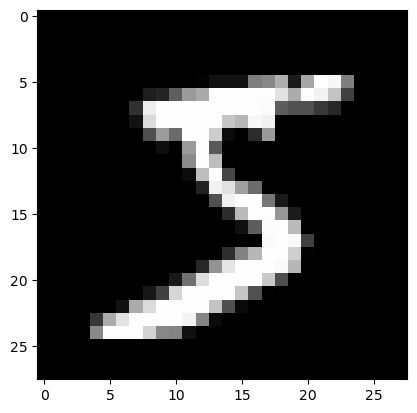

In [15]:
#visualize this with matplotlib
plt.imshow(image.reshape((28,28)),cmap='gray') #viridis, using some sort of color scale

In [16]:
#understand how to load in batches with the data loader
#subsets of 60,000 batches and then load in
torch.manual_seed(101)
train_loader=DataLoader(train_data,batch_size=100,shuffle=True) #feeding 100 images into the network
test_loader=DataLoader(test_data,batch_size=500,shuffle=False)
#train_data is pytorch object that supports dataloading and sampling
#setting shuffle to true means data will be shuffled in each epoch


In [17]:
from torchvision.utils import make_grid
#print the labels right on top of the grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) #formatting

In [18]:
#grab the first batch of images
for images,labels in train_loader:
    break
    #batch size rn is 100, since there are 60,000 images, the loop will go through 60 times. We want the first batch
    

In [19]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [20]:
images.shape

torch.Size([100, 1, 28, 28])

In [21]:
labels.shape

torch.Size([100])

Labels: [   7    2    3    5    8    5    3    6    9    9    1    3]


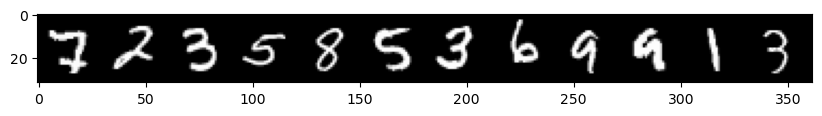

In [22]:
#print the fist 12 labels
print('Labels:',labels[:12].numpy())
#print the first 12 images
im=make_grid(images[:12],nrow=12)
#grab 12 images define the number of rows and we say plt figure and make the image larger
plt.figure(figsize=(10,4))
#we transpose the images to make it seen properly
plt.imshow(np.transpose(im.numpy(),(1,2,0)));
#we print out the 12 labels

In [43]:
#now we create the multilayer perceptron
class MultiLayerPerceptron(nn.Module):
    def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):
        super().__init__()
        self.fc1=nn.Linear(in_sz,layers[0])
        self.fc2=nn.Linear(layers[0],layers[1])
        self.fc3=nn.Linear(layers[1],out_sz)
    def forward(self,X):
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)

        return F.log_softmax(X,dim=1) #multiclass classification

In [44]:
#set a seed
torch.manual_seed(101)
model=MultiLayerPerceptron()

Model: Define the Model

In [45]:
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [46]:
#ANN has 780 neural networks connected and that outputs 120 features
#number of elements
#A huge number of parameters these are all the connections 
#sum this all up 105,214 total parameters which is a lot
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [47]:
#Moving to convulational neural network

In [48]:
#finding a loss function and an optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [49]:
images.shape

torch.Size([100, 1, 28, 28])

In [50]:
#Taking the last three and comining these into a single dimension, we will multiply the dimension size of these
#Quickest way to do this is by using view
images.view(100,-1).shape

torch.Size([100, 784])

In [53]:
# Trackers (keep these as lists to store per epoch results)
train_losses = []
test_losses = []
train_correct_list = []  # Renaming to avoid confusion with per-epoch counts
test_correct_list = []   # Renaming to avoid confusion

# Training loop
for i in range(epochs):
    train_correct = 0  # Initialize for the current epoch
    test_correct = 0   # Initialize for the current epoch
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1  # Start at the first batch
        
        # Forward pass through the network
        y_pred = model(X_train.view(100, -1))  # Flatten the input image
        loss = criterion(y_pred, y_train)      # Compute the loss
        
        # Backward pass and optimization
        optimizer.zero_grad()                  # Clear previous gradients
        loss.backward()                        # Compute new gradients
        optimizer.step()                       # Update model parameters
        
        # Compute the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]  # Get the index of the max log-probability
        batch_correct = (predicted == y_train).sum()  # Compare to ground truth
        train_correct += batch_correct  # Keep track of correct predictions
        
        if b % 200 == 0:
            accuracy = train_correct.item() * 100 / (100 * b)
            print(f'Epoch {i} batch {b} loss: {loss.item()} accuracy: {accuracy:.2f}%')
    
    # Store training metrics
    train_losses.append(loss.item())
    train_correct_list.append(train_correct.item())  # Append the total correct count for this epoch
    
    with torch.no_grad():  # Don't track gradients for test data
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500, -1))  # Flatten the test images
            predicted = torch.max(y_val.data, 1)[1]
            test_correct += (predicted == y_test).sum()
        loss = criterion(y_val, y_test)
        test_losses.append(loss.item())  # Append loss for this epoch
        test_correct_list.append(test_correct.item())  # Append the total correct count for test set

total_time = time.time() - start_time
print(f'Duration: {total_time / 60:.2f} mins')


Epoch 0 batch 200 loss: 0.1330084204673767 accuracy: 95.36%
Epoch 0 batch 400 loss: 0.1347522884607315 accuracy: 95.75%
Epoch 0 batch 600 loss: 0.057103872299194336 accuracy: 95.83%
Epoch 1 batch 200 loss: 0.027174554765224457 accuracy: 96.97%
Epoch 1 batch 400 loss: 0.18340110778808594 accuracy: 96.97%
Epoch 1 batch 600 loss: 0.03390445560216904 accuracy: 97.08%
Epoch 2 batch 200 loss: 0.029991207644343376 accuracy: 97.68%
Epoch 2 batch 400 loss: 0.15932564437389374 accuracy: 97.65%
Epoch 2 batch 600 loss: 0.03859355300664902 accuracy: 97.67%
Epoch 3 batch 200 loss: 0.039179544895887375 accuracy: 98.34%
Epoch 3 batch 400 loss: 0.08167535811662674 accuracy: 98.25%
Epoch 3 batch 600 loss: 0.12174870818853378 accuracy: 98.24%
Epoch 4 batch 200 loss: 0.10878511518239975 accuracy: 98.60%
Epoch 4 batch 400 loss: 0.046266961842775345 accuracy: 98.53%
Epoch 4 batch 600 loss: 0.0874919444322586 accuracy: 98.48%
Epoch 5 batch 200 loss: 0.05168507993221283 accuracy: 98.91%
Epoch 5 batch 400 loss

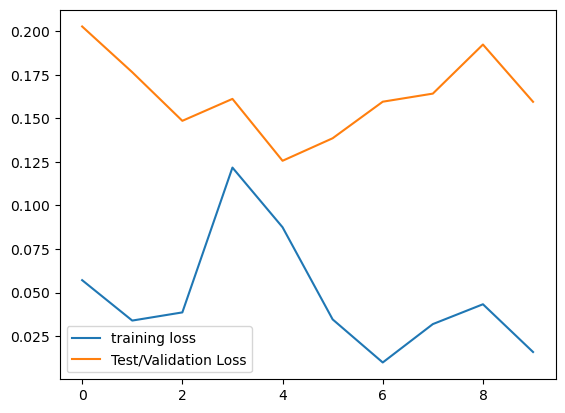

In [56]:
#plotting out our train losses 
plt.plot(train_losses,label='training loss')
plt.plot(test_losses,label='Test/Validation Loss')
plt.legend()

In [70]:
train_Accuracy=[t/600 for t in train_correct_list]
train_Accuracy

[95.825,
 97.075,
 97.675,
 98.23833333333333,
 98.47666666666667,
 98.75666666666666,
 98.96833333333333,
 99.1,
 99.26833333333333,
 99.45]

In [71]:
test_Accuracy=[t/100 for t in test_correct_list]
test_Accuracy

[96.25, 96.97, 97.4, 97.31, 97.58, 97.69, 97.58, 97.44, 97.54, 97.67]

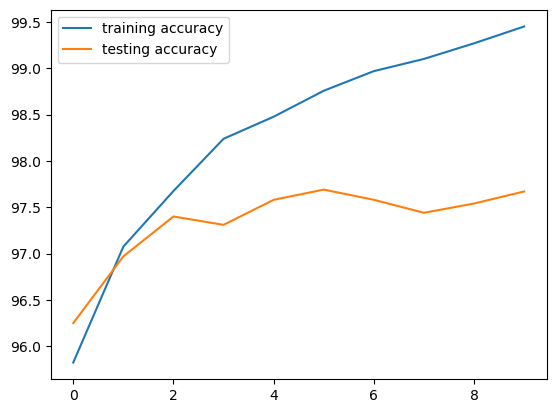

In [73]:
#plot training accuracy over time
plt.plot(train_Accuracy,label='training accuracy')
plt.plot(test_Accuracy,label='testing accuracy')
plt.legend()

In [75]:
#Evaluate the test data seperately
#for new unseen data through the trained network
test_load_all=DataLoader(test_data,batch_size=10000,shuffle=False)


In [78]:
with torch.no_grad():
    correct=0
    for X_test,y_test in test_load_all:
        y_val=model(X_test.view(len(X_test),-1)) #flattens all the images in the next test
        predicted=torch.max(y_val,1)[1]
        correct+=(predicted==y_test).sum()

In [82]:
print(f'Accuracy is {100*correct.item()/len(test_data)}')

Accuracy is 97.67


In [83]:
#confusion matrix
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 963,    0,    4,    0,    1,    2,    4,    1,    3,    0],
       [   0, 1124,    0,    0,    0,    0,    2,    3,    0,    2],
       [   0,    2, 1011,    1,    2,    0,    2,    8,    3,    0],
       [   1,    4,    3,  996,    0,   18,    1,    4,    7,    4],
       [   2,    0,    2,    0,  966,    3,    4,    7,    4,   14],
       [   0,    0,    0,    2,    0,  847,    2,    0,    2,    2],
       [   2,    2,    3,    0,    5,    4,  942,    0,    1,    1],
       [   2,    0,    2,    3,    1,    2,    0,  992,    3,    1],
       [   4,    3,    5,    4,    0,   13,    1,    4,  948,    7],
       [   6,    0,    2,    4,    7,    3,    0,    9,    3,  978]],
      dtype=int64)

In [84]:
#We can also track the misses that confused our network
misses=np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i]!=y_test[i]:
        misses=np.append(misses,i).astype('int64')
#now we will display the number of misses
len(misses)

233

In [85]:
#displaying the first 10 index positions
misses[:10]

array([ 124,  149,  151,  247,  259,  321,  340,  445,  460,  495],
      dtype=int64)

In [86]:
#set up the iterator to feed the batch rows
r=12 #this is the row size
row=iter(np.array_split(misses,len(misses)//r+1))

In [87]:
#Now that everything is set up, run and re-run the cell below to view all of the missed predictions.<br>
# Use <kbd>Ctrl+Enter</kbd> to remain on the cell between runs. You'll see a <tt>StopIteration</tt> once all the misses have been seen.

Index: [ 124  149  151  247  259  321  340  445  460  495  552  582]
Label: [   7    2    9    4    6    2    5    6    5    8    0    8]
Guess: [   4    9    8    2    0    7    3    0    9    2    9    2]


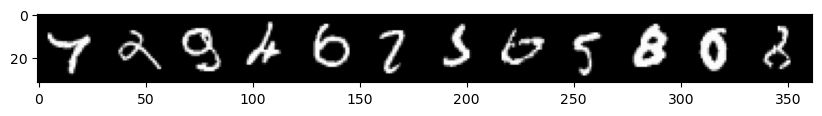

In [88]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));